In [1]:
## Importing all the libraries
import pandas as pd
import requests
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt

In [2]:
url = "https://alpha-vantage.p.rapidapi.com/query"
querystring = {"interval": "5min", "function": "TIME_SERIES_INTRADAY", "symbol": "MSFT", "datatype": "json",
               "output_size": "compact"}

headers = {
    "X-RapidAPI-Key": "ff9411e7f8mshc9251362c5e31cap1722bfjsn63362eb4e70d",
    "X-RapidAPI-Host": "alpha-vantage.p.rapidapi.com"
}
response = requests.get(url, headers=headers, params=querystring)
data = response.json()

In [3]:
meta_data = data['Meta Data']
time_series = data['Time Series (5min)']

timestamps = pd.to_datetime(list(time_series.keys()))
df = pd.DataFrame(time_series.values(), index=timestamps)

# Reset the index to get timestamp as a column
df = df.reset_index()

# Rename the timestamp column
df = df.rename(columns={"index": 'timestamp'})

# Break timestamp into subcolumns
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute


In [4]:
# Display the DataFrame
print(df)

             timestamp   1. open   2. high    3. low  4. close 5. volume  \
0  2024-02-02 19:55:00  411.0500  411.2200  410.9800  411.1400      1334   
1  2024-02-02 19:50:00  411.0000  411.2200  410.9400  411.0900      1659   
2  2024-02-02 19:45:00  411.1850  411.2200  410.8900  411.0800      1430   
3  2024-02-02 19:40:00  411.2100  411.4000  411.0000  411.2100      2544   
4  2024-02-02 19:35:00  411.0200  411.3000  411.0100  411.2050       703   
..                 ...       ...       ...       ...       ...       ...   
95 2024-02-02 12:00:00  409.8300  410.3800  409.8300  409.9400    189132   
96 2024-02-02 11:55:00  410.2800  410.2900  409.6400  409.8220    229229   
97 2024-02-02 11:50:00  409.8280  410.3100  409.7100  410.2750    348962   
98 2024-02-02 11:45:00  409.6100  409.9900  409.6000  409.8050    296584   
99 2024-02-02 11:40:00  409.2300  409.6310  409.0800  409.6200    328177   

    year  month  day  hour  minute  
0   2024      2    2    19      55  
1   2024     

In [5]:
df.head()

,timestamp,1. open,2. high,3. low,4. close,5. volume,year,month,day,hour,minute
0,2024-02-02 19:55:00,411.0500,411.2200,410.9800,411.1400,1334,2024,2,2,19,55
1,2024-02-02 19:50:00,411.0000,411.2200,410.9400,411.0900,1659,2024,2,2,19,50
2,2024-02-02 19:45:00,411.1850,411.2200,410.8900,411.0800,1430,2024,2,2,19,45
3,2024-02-02 19:40:00,411.2100,411.4000,411.0000,411.2100,2544,2024,2,2,19,40
4,2024-02-02 19:35:00,411.0200,411.3000,411.0100,411.2050,703,2024,2,2,19,35


In [8]:
new_columns = {'1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Close', '5. volume': 'Volume'}
df = df.rename(columns=new_columns)

In [9]:
df.head()

,timestamp,Open,High,Low,Close,Volume,year,month,day,hour,minute
0,2024-02-02 19:55:00,411.0500,411.2200,410.9800,411.1400,1334,2024,2,2,19,55
1,2024-02-02 19:50:00,411.0000,411.2200,410.9400,411.0900,1659,2024,2,2,19,50
2,2024-02-02 19:45:00,411.1850,411.2200,410.8900,411.0800,1430,2024,2,2,19,45
3,2024-02-02 19:40:00,411.2100,411.4000,411.0000,411.2100,2544,2024,2,2,19,40
4,2024-02-02 19:35:00,411.0200,411.3000,411.0100,411.2050,703,2024,2,2,19,35


In [12]:
profile = ProfileReport(df, title = "Pandas Profiling Report", explorative = True)

profile.to_file("microsoft-intraday-prices.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
# 1. Time-based Features
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['weekday'] = df['timestamp'].dt.dayofweek  # 0=Monday, 6=Sunday
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

In [14]:
df

,timestamp,Open,High,Low,Close,Volume,year,month,day,hour,minute,weekday,is_weekend
0,2024-02-02 19:55:00,411.0500,411.2200,410.9800,411.1400,1334,2024,2,2,19,55,4,0
1,2024-02-02 19:50:00,411.0000,411.2200,410.9400,411.0900,1659,2024,2,2,19,50,4,0
2,2024-02-02 19:45:00,411.1850,411.2200,410.8900,411.0800,1430,2024,2,2,19,45,4,0
3,2024-02-02 19:40:00,411.2100,411.4000,411.0000,411.2100,2544,2024,2,2,19,40,4,0
4,2024-02-02 19:35:00,411.0200,411.3000,411.0100,411.2050,703,2024,2,2,19,35,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2024-02-02 12:00:00,409.8300,410.3800,409.8300,409.9400,189132,2024,2,2,12,0,4,0
96,2024-02-02 11:55:00,410.2800,410.2900,409.6400,409.8220,229229,2024,2,2,11,55,4,0
97,2024-02-02 11:50:00,409.8280,410.3100,409.7100,410.2750,348962,2024,2,2,11,50,4,0
98,2024-02-02 11:45:00,409.6100,409.9900,409.6000,409.8050,296584,2024,2,2,11,45,4,0


In [16]:
# Convert 'Close' column to numeric
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# 2. Price Change Features
df['close_change'] = df['Close'].diff()
df['close_pct_change'] = df['Close'].pct_change()

In [17]:
df.head(5)

,timestamp,Open,High,Low,Close,Volume,year,month,day,hour,minute,weekday,is_weekend,close_change,close_pct_change
0,2024-02-02 19:55:00,411.0500,411.2200,410.9800,411.140,1334,2024,2,2,19,55,4,0,NaN,NaN
1,2024-02-02 19:50:00,411.0000,411.2200,410.9400,411.090,1659,2024,2,2,19,50,4,0,-0.050,-0.000122
2,2024-02-02 19:45:00,411.1850,411.2200,410.8900,411.080,1430,2024,2,2,19,45,4,0,-0.010,-0.000024
3,2024-02-02 19:40:00,411.2100,411.4000,411.0000,411.210,2544,2024,2,2,19,40,4,0,0.130,0.000316
4,2024-02-02 19:35:00,411.0200,411.3000,411.0100,411.205,703,2024,2,2,19,35,4,0,-0.005,-0.000012


In [19]:

# Convert 'Close' column to numeric
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Price Change Features
df['close_change'] = df['Close'].diff()
df['close_pct_change'] = df['Close'].pct_change()

# Display the DataFrame with new features
df

,timestamp,Open,High,Low,Close,Volume,year,month,day,hour,minute,weekday,is_weekend,close_change,close_pct_change
0,2024-02-02 19:55:00,411.0500,411.2200,410.9800,411.140,1334,2024,2,2,19,55,4,0,NaN,NaN
1,2024-02-02 19:50:00,411.0000,411.2200,410.9400,411.090,1659,2024,2,2,19,50,4,0,-0.050,-0.000122
2,2024-02-02 19:45:00,411.1850,411.2200,410.8900,411.080,1430,2024,2,2,19,45,4,0,-0.010,-0.000024
3,2024-02-02 19:40:00,411.2100,411.4000,411.0000,411.210,2544,2024,2,2,19,40,4,0,0.130,0.000316
4,2024-02-02 19:35:00,411.0200,411.3000,411.0100,411.205,703,2024,2,2,19,35,4,0,-0.005,-0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2024-02-02 12:00:00,409.8300,410.3800,409.8300,409.940,189132,2024,2,2,12,0,4,0,0.050,0.000122
96,2024-02-02 11:55:00,410.2800,410.2900,409.6400,409.822,229229,2024,2,2,11,55,4,0,-0.118,-0.000288
97,2024-02-02 11:50:00,409.8280,410.3100,409.7100,410.275,348962,2024,2,2,11,50,4,0,0.453,0.001105
98,2024-02-02 11:45:00,409.6100,409.9900,409.6000,409.805,296584,2024,2,2,11,45,4,0,-0.470,-0.001146


In [20]:
# 3. Moving Averages
df['close_ma_5'] = df['Close'].rolling(window=5).mean()
df['close_ma_10'] = df['Close'].rolling(window=10).mean()

In [21]:
df.head()

,timestamp,Open,High,Low,Close,Volume,year,month,day,hour,minute,weekday,is_weekend,close_change,close_pct_change,close_ma_5,close_ma_10
0,2024-02-02 19:55:00,411.0500,411.2200,410.9800,411.140,1334,2024,2,2,19,55,4,0,NaN,NaN,NaN,NaN
1,2024-02-02 19:50:00,411.0000,411.2200,410.9400,411.090,1659,2024,2,2,19,50,4,0,-0.050,-0.000122,NaN,NaN
2,2024-02-02 19:45:00,411.1850,411.2200,410.8900,411.080,1430,2024,2,2,19,45,4,0,-0.010,-0.000024,NaN,NaN
3,2024-02-02 19:40:00,411.2100,411.4000,411.0000,411.210,2544,2024,2,2,19,40,4,0,0.130,0.000316,NaN,NaN
4,2024-02-02 19:35:00,411.0200,411.3000,411.0100,411.205,703,2024,2,2,19,35,4,0,-0.005,-0.000012,411.145,NaN


In [23]:
# Convert 'Volume' column to numeric
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

# 5. Volume-based Features
df['volume_change'] = df['Volume'].diff()
df['volume_pct_change'] = df['Volume'].pct_change()

In [24]:
df.head()

,timestamp,Open,High,Low,Close,Volume,year,month,day,hour,minute,weekday,is_weekend,close_change,close_pct_change,close_ma_5,close_ma_10,volume_change,volume_pct_change
0,2024-02-02 19:55:00,411.0500,411.2200,410.9800,411.140,1334,2024,2,2,19,55,4,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-02-02 19:50:00,411.0000,411.2200,410.9400,411.090,1659,2024,2,2,19,50,4,0,-0.050,-0.000122,NaN,NaN,325.0,0.243628
2,2024-02-02 19:45:00,411.1850,411.2200,410.8900,411.080,1430,2024,2,2,19,45,4,0,-0.010,-0.000024,NaN,NaN,-229.0,-0.138035
3,2024-02-02 19:40:00,411.2100,411.4000,411.0000,411.210,2544,2024,2,2,19,40,4,0,0.130,0.000316,NaN,NaN,1114.0,0.779021
4,2024-02-02 19:35:00,411.0200,411.3000,411.0100,411.205,703,2024,2,2,19,35,4,0,-0.005,-0.000012,411.145,NaN,-1841.0,-0.723664


In [27]:
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')

# 6. Price Spread
df['price_spread'] = df['High'] - df['Low']

df.head()

,timestamp,Open,High,Low,Close,Volume,year,month,day,hour,minute,weekday,is_weekend,close_change,close_pct_change,close_ma_5,close_ma_10,volume_change,volume_pct_change,price_spread
0,2024-02-02 19:55:00,411.0500,411.22,410.98,411.140,1334,2024,2,2,19,55,4,0,NaN,NaN,NaN,NaN,NaN,NaN,0.24
1,2024-02-02 19:50:00,411.0000,411.22,410.94,411.090,1659,2024,2,2,19,50,4,0,-0.050,-0.000122,NaN,NaN,325.0,0.243628,0.28
2,2024-02-02 19:45:00,411.1850,411.22,410.89,411.080,1430,2024,2,2,19,45,4,0,-0.010,-0.000024,NaN,NaN,-229.0,-0.138035,0.33
3,2024-02-02 19:40:00,411.2100,411.40,411.00,411.210,2544,2024,2,2,19,40,4,0,0.130,0.000316,NaN,NaN,1114.0,0.779021,0.40
4,2024-02-02 19:35:00,411.0200,411.30,411.01,411.205,703,2024,2,2,19,35,4,0,-0.005,-0.000012,411.145,NaN,-1841.0,-0.723664,0.29


In [30]:
df.isna().sum()

timestamp             0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
year                  0
month                 0
day                   0
hour                  0
minute                0
weekday               0
is_weekend            0
close_change          1
close_pct_change      1
close_ma_5            4
close_ma_10           9
volume_change         1
volume_pct_change     1
price_spread          0
rolling_std          19
dtype: int64

In [32]:
## Changing 
df['timestamp'] = pd.to_datetime(df['timestamp'])
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)
df.head(3)

,timestamp,Open,High,Low,Close,Volume,year,month,day,hour,...,weekday,is_weekend,close_change,close_pct_change,close_ma_5,close_ma_10,volume_change,volume_pct_change,price_spread,rolling_std
0,2024-02-02 19:55:00,411.050,411.22,410.98,411.14,1334.0,2024,2,2,19,...,4,0,NaN,NaN,NaN,NaN,NaN,NaN,0.24,NaN
1,2024-02-02 19:50:00,411.000,411.22,410.94,411.09,1659.0,2024,2,2,19,...,4,0,-0.05,-0.000122,NaN,NaN,325.0,0.243628,0.28,NaN
2,2024-02-02 19:45:00,411.185,411.22,410.89,411.08,1430.0,2024,2,2,19,...,4,0,-0.01,-0.000024,NaN,NaN,-229.0,-0.138035,0.33,NaN


In [33]:
!pip install matplotlib mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 767.2 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


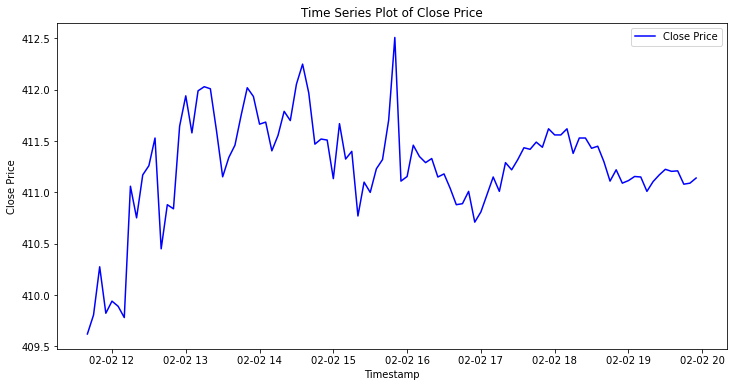

In [35]:
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['Close'], label='Close Price', color='blue')
plt.title('Time Series Plot of Close Price')
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.legend()
plt.show()

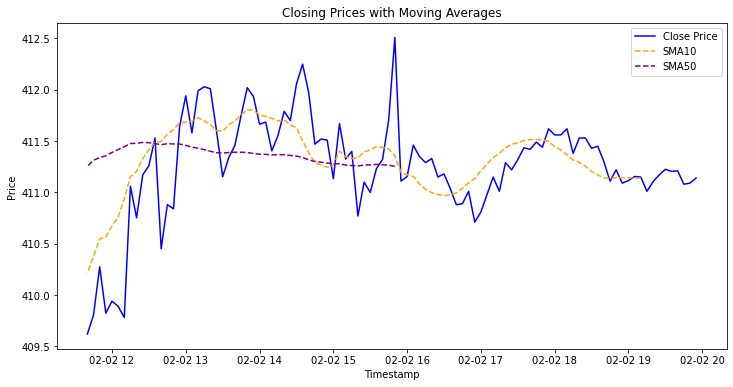

In [42]:

plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['Close'], label='Close Price', color='blue')
plt.plot(df['timestamp'], df['SMA10'], label='SMA10', color='orange', linestyle='--')
plt.plot(df['timestamp'], df['SMA50'], label='SMA50', color='purple', linestyle='--')
plt.title('Closing Prices with Moving Averages')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.show()


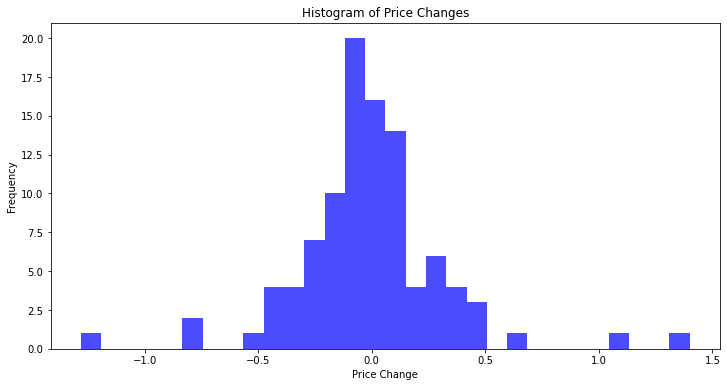

In [44]:
plt.figure(figsize=(12, 6))
plt.hist(df['close_change'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Price Changes')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.show()


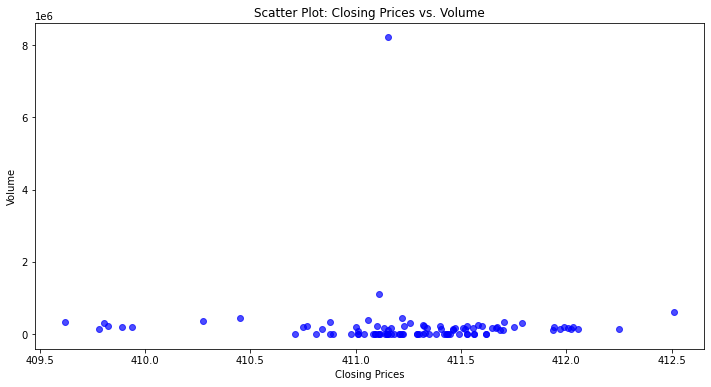

In [46]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Close'], df['Volume'], color='blue', alpha=0.7)
plt.title('Scatter Plot: Closing Prices vs. Volume')
plt.xlabel('Closing Prices')
plt.ylabel('Volume')
plt.show()

In [49]:
df.to_csv("microsoft_intraday_dataset.csv")